# Capstone Project - The Battle of the Neighborhoods in Barcelona (Week 2)
#### Yueming HU      
#### April 2, 2021

## Introduction: Business Problem 

Client L is a newly established real estate company based in Barcelona, not familiar with all the neighborhoods in Barcelona and also not sure what should be the reasonable prices to set for properties built in future in different neighborhoods. 
This project aims at helping Client L by **getting a general overview of neighborhoods’ characteristics** in Barcelona and **predicting the housing price** based on different features, such as location (neighborhood), housing size, room numbers, floor numbers, etc. 

## Data

The housing price data of Barcelona can be found in a Kaggle dataset, at https://www.kaggle.com/jorgeglez/barcelona-idealista-housingprices .

Neighborhood information is got from Foursquare Api.

To use Foursquare Api request, geographical coordinates, i.e. latitude and longitude of all the neighborhood are necessary, so the latitude and longitude are obtained through Geopy.

## Housing Price Data 

The Kaggle’s csv file is read into dataframe by pandas. There are 3265 samples and 12 columns. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [29]:
df1= pd.read_csv("Barcelona_Idealista.csv")
df1.head()

,Unnamed: 0,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


In [30]:
df1.shape

(3265, 12)

Explore the "Condition" column, to see what the unique values exist and whether different condition will have big impact on price.

In [31]:
df1['condition'].unique()

array(['good condition', 'new', 'needs refurb'], dtype=object)

In [32]:
df1_good = df1[df1['condition'] == 'good condition'] #extract each 'condition' into a dataframe, so as to make a plot
df1_new = df1[df1['condition'] == 'new']
df1_refurb = df1[df1['condition'] == 'needs refurb']

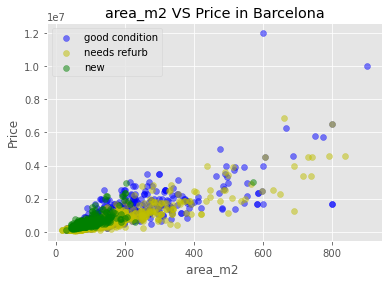

In [44]:
plt.style.use('ggplot')
plt.scatter(df1_good['area_m2'], df1_good['prices'], color= 'b', alpha=0.5, label='good condition')
plt.scatter(df1_refurb['area_m2'], df1_refurb['prices'], color= 'y', alpha=0.5, label='needs refurb')
plt.scatter(df1_new['area_m2'], df1_new['prices'], color= 'g', alpha=0.5, label='new')
plt.legend()
plt.title('area_m2 VS Price in Barcelona')
plt.xlabel('area_m2 ')
plt.ylabel('Price')
plt.show()

From the plot, we can see that the dots of different colors are mixed together, especially new and good condition, and sometimes for the same area, the needs refurb are even more expensive than the good condition. This means condition is not a decisive factor to the price, and it will not cause huge difference in prices.

Next, explore the floor column.

In [11]:
 df1['floor'].unique()

array([' floor 1', ' floor 3', ' floor 7', 'Multiple', ' floor 5',
       ' floor 2', ' floor 8', 'ground floor', ' floor 25', 'mezzanine',
       ' floor 4', ' floor 6', ' floor 9', ' floor 11', ' floor 10',
       ' floor 14', ' floor 12', ' floor 19', ' floor 21', ' floor 16'],
      dtype=object)

In [39]:
df1.replace('mezzanine', 'floor 0.5', inplace=True)
df1.replace('ground floor', 'floor 0',inplace=True)
df1.replace('Multiple', 'floor 1.5', inplace=True)
df1.head()

,Unnamed: 0,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,floor 1.5,430000


In [43]:
 #separate 'floor' and number, then put only the number in a new column 
df1['floor_number'] = df1['floor'].apply(lambda x: float(x.split(' ')[-1]))
df1.head()

,Unnamed: 0,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices,floor_number
0,0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000,1.0
1,1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000,3.0
2,2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000,7.0
3,3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000,1.0
4,4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,floor 1.5,430000,1.5


Use graph to directly see the relationship between floor number of price.

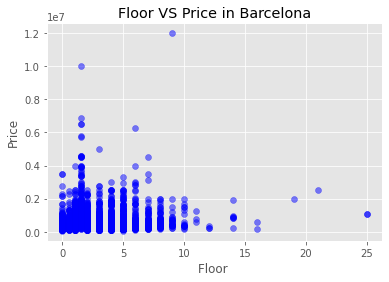

In [45]:
plt.scatter(df1['floor_number'], df1['prices'], color= 'b', alpha=0.5)
plt.title('Floor VS Price in Barcelona')
plt.xlabel('Floor ')
plt.ylabel('Price')
plt.show()

It seems that there is no strong relationship between the floor number and price. For each different floor below 10th floors, there can be very high and very low price. So, the floor feature will also not be used in this model building for a general prediction. I drop the columns that won't be used.

In [47]:
df2 = df1.drop(['Unnamed: 0', 'city', 'district', 'condition', 'type', 'lift', 'views', 'floor', 'floor_number'], axis ='columns')
df2.head()

,neighborhood,rooms,area_m2,prices
0,la Dreta de l'Eixample,3,351,2300000
1,Sant Gervasi - Galvany,5,298,1750000
2,Sant Antoni,2,90,590000
3,la Dreta de l'Eixample,2,130,450000
4,Can Baró,3,110,430000


In [48]:
df2.isnull().sum()

neighborhood    0
rooms           0
area_m2         0
prices          0
dtype: int64

In [49]:
len(df2['neighborhood'].unique())

65

In [20]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

I need to check how many samples are there for each neighborhood, because I'm afraid some neighborhoods may have low sample volume.

In [50]:
neighborhood_stats = df2.groupby('neighborhood')['neighborhood'].agg('count').sort_values(ascending = True)
neighborhood_stats

neighborhood
Ciutat Meridiana                                  2
Canyelles                                         3
la Vall d'Hebron                                  3
les Roquetes                                      4
Can Peguera                                       5
la Guineueta                                      6
Verdun                                            6
Sant Genís dels Agudells                          9
el Bon Pastor                                    10
la Trinitat Nova                                 10
la Prosperitat                                   11
Can Baró                                         12
la Font de la Guatlla                            14
la Barceloneta                                   14
la Teixonera                                     15
el Coll                                          15
la Bordeta                                       17
Sant Martí de Provençals                         20
la Salut                                         21

In [51]:
neighborhood_stats_less_than_10 = neighborhood_stats[neighborhood_stats <= 10]
neighborhood_stats_less_than_10

neighborhood
Ciutat Meridiana             2
Canyelles                    3
la Vall d'Hebron             3
les Roquetes                 4
Can Peguera                  5
la Guineueta                 6
Verdun                       6
Sant Genís dels Agudells     9
el Bon Pastor               10
la Trinitat Nova            10
Name: neighborhood, dtype: int64

In [52]:
# I put neighborhoods with less than 10 samples as 'other'
df2.neighborhood = df2.neighborhood.apply(lambda x: 'other' if x in neighborhood_stats_less_than_10 else x)
len(df2.neighborhood.unique())

56

In [53]:
df2[df2.neighborhood == 'other']

,neighborhood,rooms,area_m2,prices
163,other,3,105,240000
221,other,3,104,176000
311,other,1,66,220000
367,other,3,66,199900
369,other,4,91,353900
523,other,3,60,149500
544,other,4,70,270000
552,other,3,64,134900
563,other,2,55,133900
594,other,2,80,299000


In [246]:
len(df2[df2.neighborhood == 'other'])

58

In [292]:
df3 = df2.sort_values(['neighborhood'], ascending=[True]).reset_index(drop=True)
df3.head(10)

,neighborhood,rooms,area_m2,prices
0,Can Baró,2,74,296500
1,Can Baró,1,52,209500
2,Can Baró,1,62,235500
3,Can Baró,1,62,225500
4,Can Baró,1,52,201500
5,Can Baró,4,250,795000
6,Can Baró,3,115,270000
7,Can Baró,4,230,599000
8,Can Baró,3,110,430000
9,Can Baró,3,70,239000


In [58]:
df4 = df3.copy()
df5 = df4[~(df4["neighborhood"] == 'other')] # neighborhoods marked as 'other' won't be used
df5.shape

(3207, 4)

I want to further explore the situation in each neighborhood, so I extract all the unique neighborhood name, and assign them with different colors, so as to make plot.

In [293]:
df_neighorhood = pd.DataFrame(df5['neighborhood'].unique())
df_neighorhood.rename(columns = {0: "neighborhood"}, inplace = True)
df_neighorhood.head()

,neighborhood
0,Can Baró
1,Diagonal Mar i el Front Marítim del Poblenou
2,Horta
3,Hostafrancs
4,Navas


In [61]:
import matplotlib.cm as cm #make a color list for neighborhoods
import matplotlib.colors as colors 
x = np.arange(55)
ys = [i + x + (i*x)**2 for i in range(55)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

['#8000ff',
 '#780dff',
 '#6e1cff',
 '#642cfe',
 '#5c38fd',
 '#5247fc',
 '#4856fb',
 '#3e65fa',
 '#3670f8',
 '#2c7ef7',
 '#218cf4',
 '#1898f2',
 '#10a2f0',
 '#06aeed',
 '#04b9ea',
 '#0fc4e7',
 '#17cbe4',
 '#20d5e1',
 '#2adddd',
 '#34e4d9',
 '#3dead5',
 '#46efd1',
 '#50f4cc',
 '#5af8c8',
 '#62fbc4',
 '#6dfdbf',
 '#76ffb9',
 '#80ffb4',
 '#88ffaf',
 '#92fda9',
 '#9cfba4',
 '#a4f89f',
 '#aef498',
 '#b9ef92',
 '#c2ea8c',
 '#cbe486',
 '#d4dd80',
 '#ded579',
 '#e8cb72',
 '#f0c46c',
 '#fbb965',
 '#ffae5e',
 '#ffa256',
 '#ff9850',
 '#ff8c49',
 '#ff7e41',
 '#ff703a',
 '#ff6533',
 '#ff562c',
 '#ff4724',
 '#ff381c',
 '#ff2c16',
 '#ff1c0e',
 '#ff0d06',
 '#ff0000']

In [62]:
df_colors = pd.DataFrame(rainbow)
df_colors.rename(columns = {0: "colors"}, inplace = True)
df_colors.head()

,colors
0,#8000ff
1,#780dff
2,#6e1cff
3,#642cfe
4,#5c38fd


In [294]:
#combine the neighborhood and corresponding color into one dataframe
df6 = pd.merge(df_neighorhood, df_colors, left_index=True, right_index=True) 
df6.head()

,neighborhood,colors
0,Can Baró,#8000ff
1,Diagonal Mar i el Front Marítim del Poblenou,#780dff
2,Horta,#6e1cff
3,Hostafrancs,#642cfe
4,Navas,#5c38fd


In [295]:
df7 =  pd.merge(df5, df6, on = 'neighborhood', how='left') # then add back to previous dataframe
df7.head(10)

,neighborhood,rooms,area_m2,prices,colors
0,Can Baró,2,74,296500,#8000ff
1,Can Baró,1,52,209500,#8000ff
2,Can Baró,1,62,235500,#8000ff
3,Can Baró,1,62,225500,#8000ff
4,Can Baró,1,52,201500,#8000ff
5,Can Baró,4,250,795000,#8000ff
6,Can Baró,3,115,270000,#8000ff
7,Can Baró,4,230,599000,#8000ff
8,Can Baró,3,110,430000,#8000ff
9,Can Baró,3,70,239000,#8000ff


I draw two graphs, one general and another using different colors to show situation within each neighborhood, so as to make comparison. 

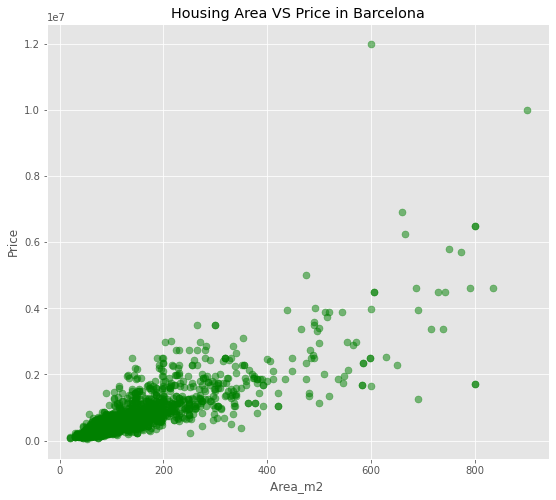

In [250]:
plt.figure(figsize=(9, 8))
plt.scatter(df7['area_m2'], df7['prices'], color= 'green', s= 50, alpha=0.5)
plt.title('Housing Area VS Price in Barcelona')
plt.xlabel('Area_m2 ')
plt.ylabel('Price')
plt.show()

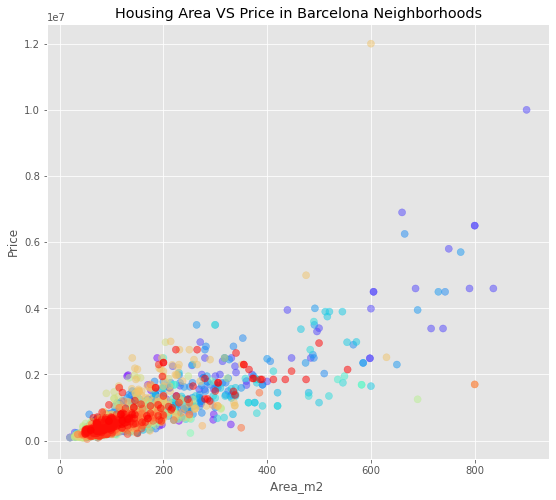

In [247]:
plt.figure(figsize=(9, 8))
plt.scatter(df7['area_m2'], df7['prices'], color= df7['colors'], s= 50, alpha=0.5)
plt.title('Housing Area VS Price in Barcelona Neighborhoods')
plt.xlabel('Area_m2 ')
plt.ylabel('Price')
plt.show()

Dots are too concentrated, so I randomly choose another neighborhood and make a separate plot.

In [252]:
df_Galvany = df7[(df7['neighborhood'] == 'Sant Gervasi - Galvany')]
df_Galvany.head()

,neighborhood,rooms,area_m2,prices,colors
417,Sant Gervasi - Galvany,4,139,695000,#218cf4
418,Sant Gervasi - Galvany,5,188,880000,#218cf4
419,Sant Gervasi - Galvany,5,298,1750000,#218cf4
420,Sant Gervasi - Galvany,6,274,1190000,#218cf4
421,Sant Gervasi - Galvany,4,160,750000,#218cf4


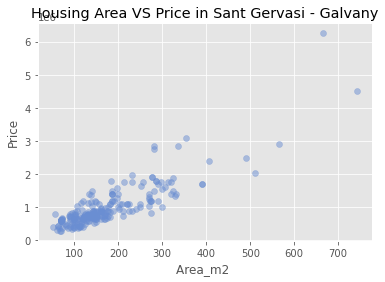

In [253]:
plt.scatter(df_Galvany['area_m2'], df_Galvany['prices'], color= '#6a8ed2', alpha=0.5)
plt.title('Housing Area VS Price in Sant Gervasi - Galvany')
plt.xlabel('Area_m2 ')
plt.ylabel('Price')
plt.show()

Then I want to see the relationship between number of rooms and price. 

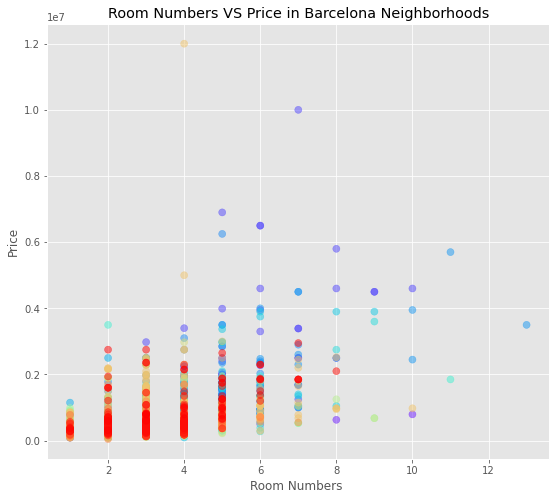

In [70]:
plt.figure(figsize=(9, 8))
plt.scatter(df7['rooms'], df7['prices'], color= df7['colors'], s= 50, alpha=0.5)
plt.title('Room Numbers VS Price in Barcelona Neighborhoods')
plt.xlabel('Room Numbers ')
plt.ylabel('Price')
plt.show()

There is a dot showing extremely high price, I'll take a further look to see if it is an outlier or mistake. 

In [71]:
df7['prices'].max()

12000000

In [72]:
df7[(df7['prices']==df7['prices'].max())]

,neighborhood,rooms,area_m2,prices,colors
2255,la Dreta de l'Eixample,4,600,12000000,#f0c46c


In [74]:
df8 = df5[~(df5['prices']==df5['prices'].max())] # remove this outlier
df8.shape

(3206, 4)

In [75]:
df8.head() # now the dataframe is ready for model building

,neighborhood,rooms,area_m2,prices
0,Can Baró,2,74,296500
1,Can Baró,1,52,209500
2,Can Baró,1,62,235500
3,Can Baró,1,62,225500
4,Can Baró,1,52,201500


## Linear regression model

Now let's create linear regrssion model. Since neighborhood feature is of string type, first I use one-hot encoding to convert all the neighborhoods into dummy variables. 

In [76]:
dummies = pd.get_dummies(df8.neighborhood)
dummies.head()

,Can Baró,Diagonal Mar i el Front Marítim del Poblenou,Horta,Hostafrancs,Navas,Pedralbes,Porta,Provençals del Poblenou,Sant Andreu,Sant Antoni,Sant Gervasi - Galvany,Sant Gervasi - la Bonanova,Sant Martí de Provençals,Sant Pere - Santa Caterina i la Ribera,Sants,Sants - Badal,Sarrià,Vallcarca i els Penitents,Vallvidrera - el Tibidabo i les Planes,Vilapicina i la Torre Llobeta,el Baix Guinardó,el Barri Gòtic,el Besòs i el Maresme,el Camp d'en Grassot i Gràcia Nova,el Camp de l'Arpa del Clot,el Carmel,el Clot,el Coll,el Congrés i els Indians,el Fort Pienc,el Guinardó,el Parc i la Llacuna del Poblenou,el Poble Sec - AEI Parc de Montjuïc,el Poblenou,el Putxet i el Farró,el Raval,l'Antiga Esquerra de l'Eixample,la Barceloneta,la Bordeta,la Dreta de l'Eixample,la Font d'en Fargues,la Font de la Guatlla,la Marina de Port,la Maternitat i Sant Ramon,la Nova Esquerra de l'Eixample,la Prosperitat,la Sagrada Família,la Sagrera,la Salut,la Teixonera,la Verneda i la Pau,la Vila Olímpica del Poblenou,la Vila de Gràcia,les Corts,les Tres Torres
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
df9 = pd.concat([df8, dummies],axis = 'columns') # adding dummies back to original dataframe
df9.head()

,neighborhood,rooms,area_m2,prices,Can Baró,Diagonal Mar i el Front Marítim del Poblenou,Horta,Hostafrancs,Navas,Pedralbes,Porta,Provençals del Poblenou,Sant Andreu,Sant Antoni,Sant Gervasi - Galvany,Sant Gervasi - la Bonanova,Sant Martí de Provençals,Sant Pere - Santa Caterina i la Ribera,Sants,Sants - Badal,Sarrià,Vallcarca i els Penitents,Vallvidrera - el Tibidabo i les Planes,Vilapicina i la Torre Llobeta,el Baix Guinardó,el Barri Gòtic,el Besòs i el Maresme,el Camp d'en Grassot i Gràcia Nova,el Camp de l'Arpa del Clot,el Carmel,el Clot,el Coll,el Congrés i els Indians,el Fort Pienc,el Guinardó,el Parc i la Llacuna del Poblenou,el Poble Sec - AEI Parc de Montjuïc,el Poblenou,el Putxet i el Farró,el Raval,l'Antiga Esquerra de l'Eixample,la Barceloneta,la Bordeta,la Dreta de l'Eixample,la Font d'en Fargues,la Font de la Guatlla,la Marina de Port,la Maternitat i Sant Ramon,la Nova Esquerra de l'Eixample,la Prosperitat,la Sagrada Família,la Sagrera,la Salut,la Teixonera,la Verneda i la Pau,la Vila Olímpica del Poblenou,la Vila de Gràcia,les Corts,les Tres Torres
0,Can Baró,2,74,296500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Can Baró,1,52,209500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Can Baró,1,62,235500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Can Baró,1,62,225500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Can Baró,1,52,201500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
df10 = df9.drop('neighborhood', axis = 'columns')
df10.head()

,rooms,area_m2,prices,Can Baró,Diagonal Mar i el Front Marítim del Poblenou,Horta,Hostafrancs,Navas,Pedralbes,Porta,Provençals del Poblenou,Sant Andreu,Sant Antoni,Sant Gervasi - Galvany,Sant Gervasi - la Bonanova,Sant Martí de Provençals,Sant Pere - Santa Caterina i la Ribera,Sants,Sants - Badal,Sarrià,Vallcarca i els Penitents,Vallvidrera - el Tibidabo i les Planes,Vilapicina i la Torre Llobeta,el Baix Guinardó,el Barri Gòtic,el Besòs i el Maresme,el Camp d'en Grassot i Gràcia Nova,el Camp de l'Arpa del Clot,el Carmel,el Clot,el Coll,el Congrés i els Indians,el Fort Pienc,el Guinardó,el Parc i la Llacuna del Poblenou,el Poble Sec - AEI Parc de Montjuïc,el Poblenou,el Putxet i el Farró,el Raval,l'Antiga Esquerra de l'Eixample,la Barceloneta,la Bordeta,la Dreta de l'Eixample,la Font d'en Fargues,la Font de la Guatlla,la Marina de Port,la Maternitat i Sant Ramon,la Nova Esquerra de l'Eixample,la Prosperitat,la Sagrada Família,la Sagrera,la Salut,la Teixonera,la Verneda i la Pau,la Vila Olímpica del Poblenou,la Vila de Gràcia,les Corts,les Tres Torres
0,2,74,296500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,52,209500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,62,235500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,62,225500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,52,201500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
X = df10.drop('prices', axis = 'columns') # getting the x for model 
X.head()

,rooms,area_m2,Can Baró,Diagonal Mar i el Front Marítim del Poblenou,Horta,Hostafrancs,Navas,Pedralbes,Porta,Provençals del Poblenou,Sant Andreu,Sant Antoni,Sant Gervasi - Galvany,Sant Gervasi - la Bonanova,Sant Martí de Provençals,Sant Pere - Santa Caterina i la Ribera,Sants,Sants - Badal,Sarrià,Vallcarca i els Penitents,Vallvidrera - el Tibidabo i les Planes,Vilapicina i la Torre Llobeta,el Baix Guinardó,el Barri Gòtic,el Besòs i el Maresme,el Camp d'en Grassot i Gràcia Nova,el Camp de l'Arpa del Clot,el Carmel,el Clot,el Coll,el Congrés i els Indians,el Fort Pienc,el Guinardó,el Parc i la Llacuna del Poblenou,el Poble Sec - AEI Parc de Montjuïc,el Poblenou,el Putxet i el Farró,el Raval,l'Antiga Esquerra de l'Eixample,la Barceloneta,la Bordeta,la Dreta de l'Eixample,la Font d'en Fargues,la Font de la Guatlla,la Marina de Port,la Maternitat i Sant Ramon,la Nova Esquerra de l'Eixample,la Prosperitat,la Sagrada Família,la Sagrera,la Salut,la Teixonera,la Verneda i la Pau,la Vila Olímpica del Poblenou,la Vila de Gràcia,les Corts,les Tres Torres
0,2,74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
y = df10.prices # y is price
y.head()

0    296500
1    209500
2    235500
3    225500
4    201500
Name: prices, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 13)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) # check the accuracy score of model

0.7833288162940156

To evaluate the model, I use cross valitdation to test the accuracy of my model. I create a shuffleSplit for the dataset, setting 5 randomized folds, and to see the range of the resulting scores.

In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76644668, 0.77273504, 0.72222751, 0.73113436, 0.79898497])

In [92]:
from sklearn import linear_model # lasso regression is tested, to see if model is overfitting
clf = linear_model.Lasso(alpha=50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7836002632608161

The linear model is ok, but it’s using the dummies to represent each neighborhood, and certainly not possible to ask client to input dummies to get results. Therefore, it’s necessary to write another function, which allows us to obtain price simply by inputting the name of neighborhoods, number of rooms and square meters of area.

In [93]:
X.columns

Index(['rooms', 'area_m2', 'Can Baró',
       'Diagonal Mar i el Front Marítim del Poblenou', 'Horta', 'Hostafrancs',
       'Navas', 'Pedralbes', 'Porta', 'Provençals del Poblenou', 'Sant Andreu',
       'Sant Antoni', 'Sant Gervasi - Galvany', 'Sant Gervasi - la Bonanova',
       'Sant Martí de Provençals', 'Sant Pere - Santa Caterina i la Ribera',
       'Sants', 'Sants - Badal', 'Sarrià', 'Vallcarca i els Penitents',
       'Vallvidrera - el Tibidabo i les Planes',
       'Vilapicina i la Torre Llobeta', 'el Baix Guinardó', 'el Barri Gòtic',
       'el Besòs i el Maresme', 'el Camp d'en Grassot i Gràcia Nova',
       'el Camp de l'Arpa del Clot', 'el Carmel', 'el Clot', 'el Coll',
       'el Congrés i els Indians', 'el Fort Pienc', 'el Guinardó',
       'el Parc i la Llacuna del Poblenou',
       'el Poble Sec - AEI Parc de Montjuïc', 'el Poblenou',
       'el Putxet i el Farró', 'el Raval', 'l'Antiga Esquerra de l'Eixample',
       'la Barceloneta', 'la Bordeta', 'la Dreta de l'Ei

In [94]:
np.where(X.columns=='Horta')[0][0] # get index of  a neighborhood

4

In [97]:
def predict_price(neighborhood, rooms, area_m2): # write a price prediction function with neighborhood name as a variable
    loc_index = np.where(X.columns==neighborhood)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0] = rooms
    x[1] = area_m2
    if loc_index >=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [98]:
predict_price('Porta', 3, 100) # example of price prediction

373886.0

In [99]:
predict_price('Diagonal Mar i el Front Marítim del Poblenou', 3, 100)

792481.0

## Neighborhood data

Now let's deal with neighborhoods data. First, install some necessary libraries.

In [100]:
import requests
from pandas.io.json import json_normalize
!pip install geopy
!pip install folium
import geopy
from geopy.geocoders import Nominatim
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [296]:
df11 = df_neighorhood.copy() # a dataframe with all neighborhoods' names
df11.head()

,neighborhood
0,Can Baró
1,Diagonal Mar i el Front Marítim del Poblenou
2,Horta
3,Hostafrancs
4,Navas


The following few steps are trying to get the geocodes of neighborhoods through Geopy.

In [102]:
df11['lat'] = ""
df11['lng'] = ""
df11.head()

,neighborhood,lat,lng
0,Can Baró,,
1,Diagonal Mar i el Front Marítim del Poblenou,,
2,Horta,,
3,Hostafrancs,,
4,Navas,,


In [103]:
for i, row in df11.iterrows():
    address = str(df11.at[i, 'neighborhood']) + ',' + str('Barcelona, Spain') # specifying the location is within Barcelona
    geolocator = Nominatim(user_agent = 'Yueming')
    location = geolocator.geocode(address)
    if location is not None: 
        lat = location.latitude
        lng = location.longitude
        df11.at[i, 'lat'] = lat
        df11.at[i, 'lng'] = lng
    else:
        df11.at[i, 'lat'] = 'none'
        df11.at[i, 'lng'] = 'none'
df11

,neighborhood,lat,lng
0,Can Baró,41.4161,2.1624
1,Diagonal Mar i el Front Marítim del Poblenou,41.4052,2.21335
2,Horta,41.433,2.15909
3,Hostafrancs,41.3751,2.14293
4,Navas,41.8989,1.87677
5,Pedralbes,41.3901,2.11222
6,Porta,41.4332,2.17603
7,Provençals del Poblenou,41.4119,2.20412
8,Sant Andreu,41.4374,2.19686
9,Sant Antoni,41.3784,2.16177


The latitude and longitude data for one neighborhood "el Poble Sec - AEI Parc de Montjuïc" is missing. I checked on the Wikipedia, the name of the neighborhood should be "el poble Sec", Parc de Montjuïc is just a place within. So I modified the name and made another request.

In [104]:
geolocator = Nominatim(user_agent= "Ming")
location = geolocator.geocode('el Poble Sec, Barcelona, Spain', timeout=None)
latitude_el = location.latitude
longitude_el = location.longitude
print(latitude_el, longitude_el)

41.3749795 2.1605721


In [105]:
df11.at[32, 'lat'] = latitude_el
df11.at[32, 'lng'] = longitude_el
df11.at[32, 'neighborhood'] = "el Poble Sec"
df11

,neighborhood,lat,lng
0,Can Baró,41.4161,2.1624
1,Diagonal Mar i el Front Marítim del Poblenou,41.4052,2.21335
2,Horta,41.433,2.15909
3,Hostafrancs,41.3751,2.14293
4,Navas,41.8989,1.87677
5,Pedralbes,41.3901,2.11222
6,Porta,41.4332,2.17603
7,Provençals del Poblenou,41.4119,2.20412
8,Sant Andreu,41.4374,2.19686
9,Sant Antoni,41.3784,2.16177


In [106]:
geolocator = Nominatim(user_agent= "Ming")
location = geolocator.geocode('Province of Barcelona, Spain', timeout=None)
latitude_bcn = location.latitude
longitude_bcn = location.longitude
print(latitude_bcn, longitude_bcn)

41.387889 2.1685031


In [107]:
# create map of Barcelona using latitude and longitude values
map_bcn = folium.Map(location=[latitude_bcn, longitude_bcn], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df11['lat'], df11['lng'], df11['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn)  
    
map_bcn

I noticed that two dots on the map are quite far away from Barcelona, the geographic data of the two neighborhoods may not be correct. Therefore, I modified the address name and requested again.

In [108]:
geolocator = Nominatim(user_agent= "Ming")
location = geolocator.geocode('el Coll, Gràcia, Barcelona, Spain', timeout=None)
lat_el_coll = location.latitude
lng_el_coll = location.longitude
print(lat_el_coll, lng_el_coll)

41.4179072 2.1480753


In [109]:
geolocator = Nominatim(user_agent= "Ming")
location = geolocator.geocode('Navas, Sant Andreu, Barcelona, Spain', timeout=None)
lat_na = location.latitude
lng_na = location.longitude
print(lat_na, lng_na)

41.4181775 2.1851330591693436


In [111]:
df12 = df11.copy() # adding the correct geocode data back to dataframe
df12.at[27, 'lat'] = lat_el_coll
df12.at[27, 'lng'] = lng_el_coll
df12.at[4, 'lat'] = lat_na
df12.at[4, 'lng'] = lng_na
df12

,neighborhood,lat,lng
0,Can Baró,41.4161,2.1624
1,Diagonal Mar i el Front Marítim del Poblenou,41.4052,2.21335
2,Horta,41.433,2.15909
3,Hostafrancs,41.3751,2.14293
4,Navas,41.4182,2.18513
5,Pedralbes,41.3901,2.11222
6,Porta,41.4332,2.17603
7,Provençals del Poblenou,41.4119,2.20412
8,Sant Andreu,41.4374,2.19686
9,Sant Antoni,41.3784,2.16177


In [112]:
# draw the map again
map_bcn2 = folium.Map(location=[latitude_bcn, longitude_bcn], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df12['lat'], df12['lng'], df12['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn2)  
    
map_bcn2

I'll use the Foursquare Api to get nearby venue information of each neighborhood.

In [113]:
CLIENT_ID = 'X1MCFK0JBJQDVE5SGU0N54PB4RENNOBX4NJX2NTDRKSIMG1C' 
CLIENT_SECRET = 'RHMUNGVDQ34DWUNM2YU2NU2YWP54UDP1I4F4P4IKCYEAZU0M' 
VERSION = '20180604'
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X1MCFK0JBJQDVE5SGU0N54PB4RENNOBX4NJX2NTDRKSIMG1C
CLIENT_SECRET:RHMUNGVDQ34DWUNM2YU2NU2YWP54UDP1I4F4P4IKCYEAZU0M


In [114]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request 
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [115]:
bcn_venues = getNearbyVenues(names=df12['neighborhood'], latitudes=df12['lat'], longitudes=df12['lng'])

Can Baró
Diagonal Mar i el Front Marítim del Poblenou
Horta
Hostafrancs
Navas
Pedralbes
Porta
Provençals del Poblenou
Sant Andreu
Sant Antoni
Sant Gervasi - Galvany
Sant Gervasi - la Bonanova
Sant Martí de Provençals
Sant Pere - Santa Caterina i la Ribera
Sants
Sants - Badal
Sarrià
Vallcarca i els Penitents
Vallvidrera - el Tibidabo i les Planes
Vilapicina i la Torre Llobeta
el Baix Guinardó
el Barri Gòtic
el Besòs i el Maresme
el Camp d'en Grassot i Gràcia Nova
el Camp de l'Arpa del Clot
el Carmel
el Clot
el Coll
el Congrés i els Indians
el Fort Pienc
el Guinardó
el Parc i la Llacuna del Poblenou
el Poble Sec
el Poblenou
el Putxet i el Farró
el Raval
l'Antiga Esquerra de l'Eixample
la Barceloneta
la Bordeta
la Dreta de l'Eixample
la Font d'en Fargues
la Font de la Guatlla
la Marina de Port
la Maternitat i Sant Ramon
la Nova Esquerra de l'Eixample
la Prosperitat
la Sagrada Família
la Sagrera
la Salut
la Teixonera
la Verneda i la Pau
la Vila Olímpica del Poblenou
la Vila de Gràcia
les C

In [116]:
bcn_venues.head() 

,Neighborhood Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Can Baró,41.416092,2.162402,Búnkers del Carmel,41.419228,2.161692,Historic Site
1,Can Baró,41.416092,2.162402,Turó de la Rovira,41.419269,2.161711,Scenic Lookout
2,Can Baró,41.416092,2.162402,Terra Mia,41.416161,2.157615,Italian Restaurant
3,Can Baró,41.416092,2.162402,El Mirador,41.417081,2.158724,Spanish Restaurant
4,Can Baró,41.416092,2.162402,Comida De Olla,41.412222,2.164279,Restaurant


In [117]:
bcn_venues.shape

(2935, 7)

In [119]:
bcn_venues.groupby('Neighborhood Name').count() # count the sample number of each neighborhood

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood Name,,,,,,
Can Baró,27,27,27,27,27,27
Diagonal Mar i el Front Marítim del Poblenou,31,31,31,31,31,31
Horta,37,37,37,37,37,37
Hostafrancs,53,53,53,53,53,53
Navas,47,47,47,47,47,47
Pedralbes,21,21,21,21,21,21
Porta,49,49,49,49,49,49
Provençals del Poblenou,31,31,31,31,31,31
Sant Andreu,77,77,77,77,77,77


In [120]:
print('There are {} uniques categories.'.format(len(bcn_venues['Venue Category'].unique())))

There are 279 uniques categories.


The venues are features now, so I convert the venue categories into dummy codes, which can be used directly for analysis and in the model.

In [121]:
dummies = pd.get_dummies(bcn_venues[['Venue Category']], prefix="", prefix_sep="")
dummies.head()

,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0

In [122]:
df13 = pd.concat([bcn_venues, dummies],axis = 'columns')
df13.head()

,Neighborhood Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vid

In [123]:
df14 = df13.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis ='columns')
df14.head()

,Neighborhood Name,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Stud

In [297]:
df15 = df14.groupby('Neighborhood Name').mean().reset_index()
df15.head()

,Neighborhood Name,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Stud

In [209]:
num_top_venues = 5 # list 5 most common venues in each neighborhood 

for hood in df15['Neighborhood Name']:
    print("----"+hood+"----")
    temp = df15[df15['Neighborhood Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Can Baró----
                venue  freq
0  Spanish Restaurant  0.15
1       Grocery Store  0.07
2      Scenic Lookout  0.07
3  Chinese Restaurant  0.07
4                 Bar  0.07


----Diagonal Mar i el Front Marítim del Poblenou----
                      venue  freq
0                Restaurant  0.16
1  Mediterranean Restaurant  0.16
2        Italian Restaurant  0.06
3                 Beach Bar  0.06
4                     Beach  0.06


----Horta----
                      venue  freq
0          Tapas Restaurant  0.11
1               Pizza Place  0.08
2        Spanish Restaurant  0.08
3  Mediterranean Restaurant  0.05
4            Sandwich Place  0.05


----Hostafrancs----
                      venue  freq
0          Tapas Restaurant  0.09
1        Spanish Restaurant  0.08
2  Mediterranean Restaurant  0.06
3                     Hotel  0.06
4               Pizza Place  0.06


----Navas----
                venue  freq
0         Supermarket  0.13
1              Bakery  0.11
2       Gr

                      venue  freq
0  Mediterranean Restaurant  0.07
1                    Bakery  0.05
2                       Bar  0.05
3               Pizza Place  0.05
4                     Plaza  0.05


----les Corts----
                venue  freq
0  Spanish Restaurant  0.09
1              Bakery  0.07
2          Restaurant  0.07
3               Hotel  0.05
4       Grocery Store  0.05


----les Tres Torres----
                 venue  freq
0                Hotel  0.09
1  Japanese Restaurant  0.06
2           Restaurant  0.06
3                 Café  0.06
4         Burger Joint  0.06




In [127]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [221]:
num_top_venues = 6 # make a dataframe of 6 most common venues of each neighborhhood

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df16 = pd.DataFrame(columns=columns)
df16['Neighborhood Name'] = df15['Neighborhood Name']

for ind in np.arange(df15.shape[0]):
    df16.iloc[ind, 1:] = return_most_common_venues(df15.iloc[ind, :], num_top_venues)

df16.head()

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Can Baró,Spanish Restaurant,Scenic Lookout,Chinese Restaurant,Bar,Grocery Store,Basketball Court
1,Diagonal Mar i el Front Marítim del Poblenou,Mediterranean Restaurant,Restaurant,Hotel,Italian Restaurant,Beach Bar,Beach
2,Horta,Tapas Restaurant,Pizza Place,Spanish Restaurant,Mediterranean Restaurant,Breakfast Spot,Sandwich Place
3,Hostafrancs,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Pizza Place,Hotel,Bar
4,Navas,Supermarket,Grocery Store,Bakery,Tapas Restaurant,Plaza,Spanish Restaurant


## K-means model

In [129]:
X2 =df15.drop('Neighborhood Name', 1) # x is the dummy codes of venue categories
X2.head()

,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Track,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0

First I need to decide how many clusters to be set. I use the elbow method to find out the optimal k number.

In [139]:
k_rng = range(1,10) # the range of k is from 1 to 10
sse = []
for k in k_rng:
    k_means = KMeans(init="k-means++", n_clusters= k)
    k_means.fit(X2)
    sse.append(k_means.inertia_)
sse

[1.9652171103285194,
 1.786904585803485,
 1.6549288400362248,
 1.499972434676647,
 1.369035741406996,
 1.28208959776787,
 1.2949794403734378,
 1.1581386869335188,
 1.1045686086821485]

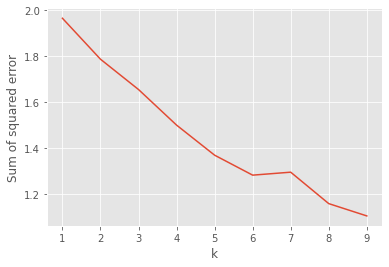

In [140]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

From the graph, I think the inflection point is 6, which means the optimal number of clusters is 6. But the line continues going down after 7 and 8, so I have some doubts, and I decide to explore further to confirm. I print out all the labels for k valuing at 6, 7 and 8. 

In [207]:
kclusters = 6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X2) # run k-means clustering

labels6 = kmeans.labels_
print(labels6)

[3 1 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 2 5 3 3 3 1 3 3 0 3 4 3 3 3 1 3 3 2 3 3
 3 3 1 3 3 2 3 2 3 3 3 3 3 0 3 3 3 1]


In [218]:
kclusters = 7

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X2)

labels7 = kmeans.labels_
print(labels7)

[1 3 2 2 1 3 1 3 1 2 3 2 1 2 2 2 2 0 6 1 1 2 3 2 3 0 3 4 1 3 1 3 2 2 2 2 3
 2 1 3 1 1 3 3 2 5 3 1 1 3 1 2 2 3 3]


In [219]:
kclusters = 8


kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X2)

labels8 = kmeans.labels_
print(labels8)

[6 4 4 4 2 0 4 4 4 4 4 4 0 4 4 4 4 0 5 2 4 4 1 4 0 2 0 7 2 4 4 4 4 4 4 4 4
 4 0 4 0 4 0 0 4 6 4 0 6 3 2 4 4 0 0]


When k is 6, there are two labels with only one neighborhood, which means there two neighborhoods are special and don’t belong to any other cluster. However, when k is 7, there is one more label with just one neighborhood, and when k is 8, there two more labels with just one neighborhood. This means the increased clusters contain only one neighborhood, making more special neighborhoods. So 6 is the optimal number of clusters.

In [222]:
df16.insert(0, 'Cluster Labels', labels6) # adding labels back to previous dataframe
df16.head()

,Cluster Labels,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,3,Can Baró,Spanish Restaurant,Scenic Lookout,Chinese Restaurant,Bar,Grocery Store,Basketball Court
1,1,Diagonal Mar i el Front Marítim del Poblenou,Mediterranean Restaurant,Restaurant,Hotel,Italian Restaurant,Beach Bar,Beach
2,3,Horta,Tapas Restaurant,Pizza Place,Spanish Restaurant,Mediterranean Restaurant,Breakfast Spot,Sandwich Place
3,3,Hostafrancs,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Pizza Place,Hotel,Bar
4,3,Navas,Supermarket,Grocery Store,Bakery,Tapas Restaurant,Plaza,Spanish Restaurant


In [224]:
df17 = df12.copy()
df17.head()

,neighborhood,lat,lng
0,Can Baró,41.4161,2.1624
1,Diagonal Mar i el Front Marítim del Poblenou,41.4052,2.21335
2,Horta,41.433,2.15909
3,Hostafrancs,41.3751,2.14293
4,Navas,41.4182,2.18513


In [225]:
df17.rename(columns = {"neighborhood": "Neighborhood Name"}, inplace = True) # modify column name to facilitate dataframe merge 
df17.head()

,Neighborhood Name,lat,lng
0,Can Baró,41.4161,2.1624
1,Diagonal Mar i el Front Marítim del Poblenou,41.4052,2.21335
2,Horta,41.433,2.15909
3,Hostafrancs,41.3751,2.14293
4,Navas,41.4182,2.18513


In [226]:
df17 = df17.join(df16.set_index('Neighborhood Name'), on='Neighborhood Name')
df17.head()

,Neighborhood Name,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Can Baró,41.4161,2.1624,3,Spanish Restaurant,Scenic Lookout,Chinese Restaurant,Bar,Grocery Store,Basketball Court
1,Diagonal Mar i el Front Marítim del Poblenou,41.4052,2.21335,1,Mediterranean Restaurant,Restaurant,Hotel,Italian Restaurant,Beach Bar,Beach
2,Horta,41.433,2.15909,3,Tapas Restaurant,Pizza Place,Spanish Restaurant,Mediterranean Restaurant,Breakfast Spot,Sandwich Place
3,Hostafrancs,41.3751,2.14293,3,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Pizza Place,Hotel,Bar
4,Navas,41.4182,2.18513,3,Supermarket,Grocery Store,Bakery,Tapas Restaurant,Plaza,Spanish Restaurant


In [227]:
df17.shape

(55, 10)

In [288]:
# create map of neighborhood clusters
map_clusters = folium.Map(location=[latitude_bcn, longitude_bcn], zoom_start=11)

# set color scheme for the clusters
x3 = np.arange(kclusters)
ys = [i + x3 + (i*x3)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df17['lat'], df17['lng'], df17['Neighborhood Name'], df17['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Neighborhood Characteristics

Now I can extract the neighborhoods as well as their 6 most common venues of each type, so as to summarize their respective characteristics.

In [229]:
cluster0 = df17.loc[df17['Cluster Labels'] == 0, df17.columns[[0] + list(range(4, df17.shape[1]))]]
cluster0 # neighborhoods of cluster 0 (type 1)

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
25,el Carmel,Supermarket,Gym,Café,Food Court,Grocery Store,Coffee Shop
50,la Verneda i la Pau,Coffee Shop,Grocery Store,Tapas Restaurant,Café,Bakery,Plaza


We can see that two neighborhoods belong to luster 0, marked by red dots, loacted in the outer side of Barcelona. Café and coffee shops are common venues, so it good for friends meeting and drinking coffee. Buying food would also be very convenient, because there are supermarkets, food courts and grocery store. This cluster can be characterised as Food and Café Easily Accessible Neighborhoods.   

In [257]:
predict_price('el Carmel', 6, 120) #predict the housing price of one neighborhood in this type

315936.0

In [230]:
cluster1 = df17.loc[df17['Cluster Labels'] == 1, df17.columns[[0] + list(range(4, df17.shape[1]))]]
cluster1 # neighborhoods of cluster 1 (type 2)

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
1,Diagonal Mar i el Front Marítim del Poblenou,Mediterranean Restaurant,Restaurant,Hotel,Italian Restaurant,Beach Bar,Beach
22,el Besòs i el Maresme,Hotel,Diner,Supermarket,Gym / Fitness Center,Bakery,Spanish Restaurant
31,el Parc i la Llacuna del Poblenou,Hotel,Bar,Restaurant,Spanish Restaurant,Clothing Store,Coffee Shop
39,la Dreta de l'Eixample,Hotel,Boutique,Mediterranean Restaurant,Tapas Restaurant,Hostel,Restaurant
54,les Tres Torres,Hotel,Burger Joint,Spanish Restaurant,Mexican Restaurant,Restaurant,Train Station


Hotel is the most common venues in this cluster of neighorhoods, and from map we can see they mainly located near the beach and central parts of Barcelona. There are also train station, restaurants, boutiques and clothing store, so this cluster is frequented by tourists or travelers, we can characterise it as tourist-concentrated and commercialized neighborhoods.

In [259]:
predict_price("la Dreta de l'Eixample", 6, 120)

628630.0

In [258]:
print(cluster1['Neighborhood Name']) 

1     Diagonal Mar i el Front Marítim del Poblenou
22                           el Besòs i el Maresme
31               el Parc i la Llacuna del Poblenou
39                          la Dreta de l'Eixample
54                                 les Tres Torres
Name: Neighborhood Name, dtype: object


In [231]:
cluster2 = df17.loc[df17['Cluster Labels'] == 2, df17.columns[[0] + list(range(4, df17.shape[1]))]]
cluster2 # neighborhoods of cluster 2 (type 3)

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
10,Sant Gervasi - Galvany,Mediterranean Restaurant,Deli / Bodega,Café,Japanese Restaurant,Italian Restaurant,Spanish Restaurant
16,Sarrià,Bakery,Breakfast Spot,Mediterranean Restaurant,Café,Tapas Restaurant,Dessert Shop
17,Vallcarca i els Penitents,Café,Grocery Store,Hotel,Park,Plaza,Supermarket
34,el Putxet i el Farró,Bakery,Café,Burger Joint,Italian Restaurant,Wine Bar,Tapas Restaurant
42,la Marina de Port,Bakery,Grocery Store,Spanish Restaurant,Café,Hotel,Soccer Field
44,la Nova Esquerra de l'Eixample,Mediterranean Restaurant,Café,Indian Restaurant,Supermarket,Bakery,Japanese Restaurant


This type of neighborhoods have diversified restaurants, Japanese, Italian, Spanish, Indian, Mediterranean and Tapas restaurants. Bakery and dessert shop are also very common. we can characterise it as Gourmet Neighborhoods.

In [269]:
predict_price("Sant Gervasi - Galvany", 5, 100)

550879.0

In [266]:
print(cluster2['Neighborhood Name'])

10            Sant Gervasi - Galvany
16                            Sarrià
17         Vallcarca i els Penitents
34              el Putxet i el Farró
42                 la Marina de Port
44    la Nova Esquerra de l'Eixample
Name: Neighborhood Name, dtype: object


In [232]:
cluster3 = df17.loc[df17['Cluster Labels'] == 3, df17.columns[[0] + list(range(4, df17.shape[1]))]]
cluster3 #  neighborhoods of cluster 3 (type 4)

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Can Baró,Spanish Restaurant,Scenic Lookout,Chinese Restaurant,Bar,Grocery Store,Basketball Court
2,Horta,Tapas Restaurant,Pizza Place,Spanish Restaurant,Mediterranean Restaurant,Breakfast Spot,Sandwich Place
3,Hostafrancs,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Pizza Place,Hotel,Bar
4,Navas,Supermarket,Grocery Store,Bakery,Tapas Restaurant,Plaza,Spanish Restaurant
5,Pedralbes,Garden,Mediterranean Restaurant,Park,Spanish Restaurant,Print Shop,Bar
6,Porta,Tapas Restaurant,Café,Grocery Store,Spanish Restaurant,Pizza Place,Plaza
7,Provençals del Poblenou,Mediterranean Restaurant,Restaurant,Asian Restaurant,Café,Spanish Restaurant,Sports Club
8,Sant Andreu,Clothing Store,Fast Food Restaurant,Burger Joint,Tapas Restaurant,Spanish Restaurant,Women's Store
9,Sant Antoni,Cocktail Bar,Café,Italian Restaurant,Tapas Restaurant,Bar,Coffee Shop
11,Sant Gervasi - la Bonanova,Bar,Bakery,Seafood Restaurant,Mediterranean Restaurant,Spanish Restaurant,Japanese Restaurant


The majority of neighborhoods belong to this cluster and the venues are very comprehensive. There are sporting venues, such as basketball court, sports club, soccer filed and gym; outdoor open spaces, such as plaza, park and garden; different kinds of restaurants and bars; and convenient living facilities, such as grocery store, print shop, supermarket. So this cluster can be characterised as Comprehensive Cozy Living Neighborhoods. 

In [275]:
predict_price("les Corts", 6, 120)

483042.0

In [276]:
predict_price("Hostafrancs", 6, 120)

351790.0

In [291]:
print(cluster3['Neighborhood Name'])

0                                   Can Baró
2                                      Horta
3                                Hostafrancs
4                                      Navas
5                                  Pedralbes
6                                      Porta
7                    Provençals del Poblenou
8                                Sant Andreu
9                                Sant Antoni
11                Sant Gervasi - la Bonanova
12                  Sant Martí de Provençals
13    Sant Pere - Santa Caterina i la Ribera
14                                     Sants
15                             Sants - Badal
19             Vilapicina i la Torre Llobeta
20                          el Baix Guinardó
21                            el Barri Gòtic
23        el Camp d'en Grassot i Gràcia Nova
24                el Camp de l'Arpa del Clot
26                                   el Clot
28                  el Congrés i els Indians
29                             el Fort Pienc
30        

In [233]:
cluster4 = df17.loc[df17['Cluster Labels'] == 4, df17.columns[[0] + list(range(4, df17.shape[1]))]]
cluster4  #  neighborhoods of cluster 4 (type 5)

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
27,el Coll,Hotel,Scenic Lookout,Park,Mediterranean Restaurant,Mountain,Supermarket


This is a special neighborhood, with a mountain nearby, scenic views and park. It should be a very beautiful and natural neighborhood in the outer fringe of Barcelona. So it's a Special Mountain View Neighborhood. 

In [278]:
predict_price("el Coll", 6, 120)

303193.0

In [234]:
cluster5 = df17.loc[df17['Cluster Labels'] == 5, df17.columns[[0] + list(range(4, df17.shape[1]))]]
cluster5  #  neighborhoods of cluster 5 (type 6)

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
18,Vallvidrera - el Tibidabo i les Planes,Museum,Tourist Information Center,Spanish Restaurant,Restaurant,Soccer Field,Zoo


Another special neighborhood, located far away from the downtown area of Barcelona. It is also a tourist destination, with museum, zoo and open space. It's a place to enjoy living away from city bustle.

In [286]:
predict_price("Vallvidrera - el Tibidabo i les Planes", 5, 160)

386378.0

Using words to describe each type of neighborhoods is ok, but lack a direct visualization. So maybe I can try to use wordcloud to show the keywords of venues in each neighborhood type.

In [189]:
!pip install wordcloud

In [190]:
from wordcloud import WordCloud, STOPWORDS

In [254]:
stopwords = set(STOPWORDS)
def Mywordcloud_s(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=10, # certain type has only several neighborhoods, so maxium words number is set lower
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(9,9))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

In [261]:
stopwords = set(STOPWORDS)
def Mywordcloud_l(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=20, # # certain type has many neighborhoods, so maxium words number is set higher
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(9,9))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

The wordcloud images of each neighborhood cluster are as follows.

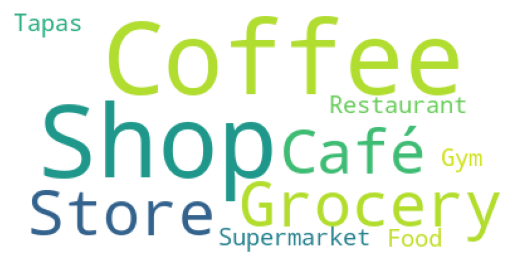

In [256]:
Mywordcloud_s(cluster0["1st Most Common Venue"].append(
    cluster0["2nd Most Common Venue"]).append(
    cluster0["3rd Most Common Venue"]).append(
    cluster0["4th Most Common Venue"]).append(
    cluster0["5th Most Common Venue"]).append(
    cluster0["6th Most Common Venue"]))

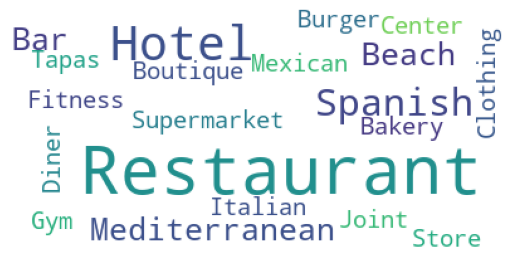

In [265]:
Mywordcloud_l(cluster1["1st Most Common Venue"].append(
    cluster1["2nd Most Common Venue"]).append(
    cluster1["3rd Most Common Venue"]).append(
    cluster1["4th Most Common Venue"]).append(
    cluster1["5th Most Common Venue"]).append(
    cluster1["6th Most Common Venue"]))

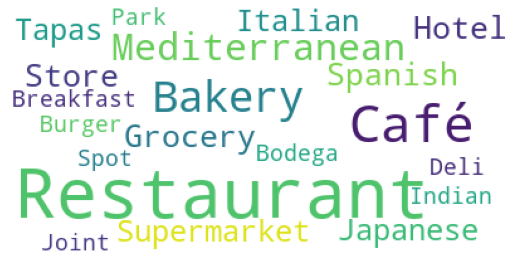

In [270]:
Mywordcloud_l(cluster2["1st Most Common Venue"].append(
    cluster2["2nd Most Common Venue"]).append(
    cluster2["3rd Most Common Venue"]).append(
    cluster2["4th Most Common Venue"]).append(
    cluster2["5th Most Common Venue"]).append(
    cluster2["6th Most Common Venue"]))

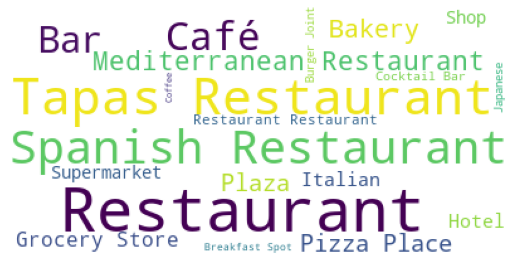

In [277]:
Mywordcloud_l(cluster3["1st Most Common Venue"].append(
    cluster3["2nd Most Common Venue"]).append(
    cluster3["3rd Most Common Venue"]).append(
    cluster3["4th Most Common Venue"]).append(
    cluster3["5th Most Common Venue"]).append(
    cluster3["6th Most Common Venue"]))

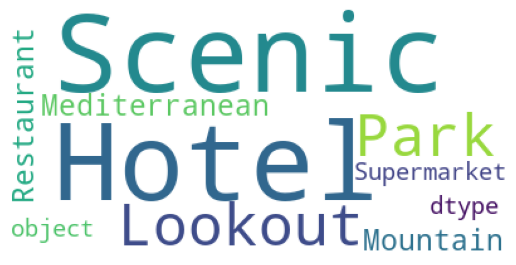

In [279]:
Mywordcloud_s(cluster4["1st Most Common Venue"].append(
    cluster4["2nd Most Common Venue"]).append(
    cluster4["3rd Most Common Venue"]).append(
    cluster4["4th Most Common Venue"]).append(
    cluster4["5th Most Common Venue"]).append(
    cluster4["6th Most Common Venue"]))

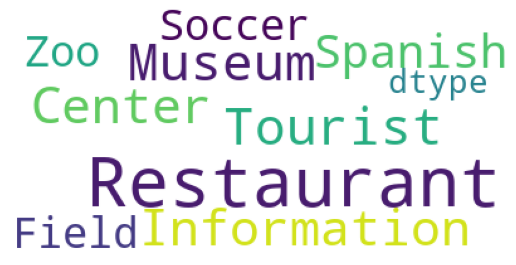

In [287]:
Mywordcloud_s(cluster5["1st Most Common Venue"].append(
    cluster5["2nd Most Common Venue"]).append(
    cluster5["3rd Most Common Venue"]).append(
    cluster5["4th Most Common Venue"]).append(
    cluster5["5th Most Common Venue"]).append(
    cluster5["6th Most Common Venue"]))